In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
from math import pi,atan
import ipywidgets as ipw
import math

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [2]:
class models:
  def __init__(self,**kwargs):
    """
    Parameters
    _________________
    :param model            string options: 'lv','sir'         
    :param state_init:      initial options: x,y or s,i,r
    :param time_step:       step size
    :param tend:            stopping time
    :param N:               population size for sir
    :param ninter:          number of time intervals
    """

    self.__dict__.update((param, value) for param,value in kwargs.items()) 

    self._select_model()

    self.times = np.split(np.linspace(0.,self.tend, self.time_step),self.ninter)                                    
    self.states = list()
    self.parameters = list()


  def _select_model(self):
    if self.model=='sir':
      self.samples = 2
      self.system = self._sir
    elif self.model=='lv':
      self.samples = 4
      self.system = self._lv
    else:
      ValueError('Must select model-options: sir or lv')

  def _sir(self,states,time, beta,gamma):
    dx_1dt = -beta * states[0] * states[1] / self.N
    dx_2dt = beta * states[0] * \
              states[1] / self.N - gamma  * states[1]
    dx_3dt = gamma * states[1]
    diffs = np.array([dx_1dt, dx_2dt, dx_3dt])
    return diffs


  def _lv(self,states,time, alpha, beta, delta, gamma):
      dx_1dt = states[0] * (alpha - beta * states[1])
      dx_2dt = states[1] * (-delta + gamma * states[0])
      diffs= np.array([dx_1dt, dx_2dt])
      return diffs


  def _get_parameters(self,start=0,end=1):
    """
    Params:
    ---------------
    :param samples: number of paramters to return
    :param start: lower bound of support for uniform dist
    :param end: upper bound of support for uniform dist

    Returns:
    ---------------
    :param alpha: average per capita birthrate of the prey
    :param delta: conversion factor
    :param gamma: fraction of prey caught per predator per unit time
    :param beta: average per capita birthrate of the predators
    OR
    :param beta: Contact rate
    :param gamma: Mean recovery rate
    """
    return tuple([np.random.uniform(start,end) for _ in range(self.samples)])


  def _integrate(self, ode_system, x0,time,qoi):
    """
    """
    return integrate.odeint(ode_system, x0, time, args = qoi)

  def _run_model(self):
    """

    """
    if self.model =='sir':

        X0 = self.state_init

        for i in range(self.ninter):

          pargs = self._get_parameters()                 
          s,i,r = self._integrate(self.system, X0, self.times[i], pargs).T
          X0 = s[-1],i[-1],r[-1]
          self._save_output(np.column_stack([s,i,r]),pargs[0]/pargs[1])

    elif self.model == 'lv':

        X0 = list(self.state_init)      

        for i in range(self.ninter):

            pargs = self._get_parameters()
            res = self._integrate(self.system,X0,self.times[i],pargs)
            X0 = res[-1,:]
            self._save_output(res,pargs)
    else:
        raise ValueError('Must select model-options: sir or lv')

  def _save_output(self,state,parameter):
      self.states.append(state)
      self.parameters.append(parameter)

  def _get_outputs(self):
    return np.asarray(self.states), np.asarray(self.parameters), np.asarray(self.times)




In [3]:
args ={
    'model':'lv',
    'state_init': np.array([4,2]),
    'time_step': 1000,
    'tend':20,
    'N':250,
    'ninter':5
    }

pred_prey = models(**args)
pred_prey._run_model()
lv_states, lv_parameters, lv_times = pred_prey._get_outputs()

In [4]:
print('states dim: {} \n'.format(lv_states.shape))
print('parameters dim: {} \n'.format(lv_parameters.shape))
print('times dim {}: \n'.format(lv_times.shape))

states dim: (5, 200, 2) 

parameters dim: (5, 4) 

times dim (5, 200): 



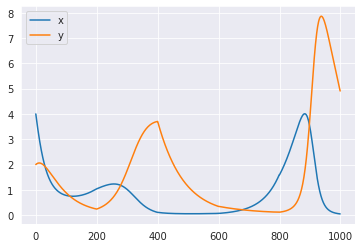

In [5]:
lines = plt.plot(np.concatenate(lv_states))
plt.legend(lines,('x','y'))
plt.show()

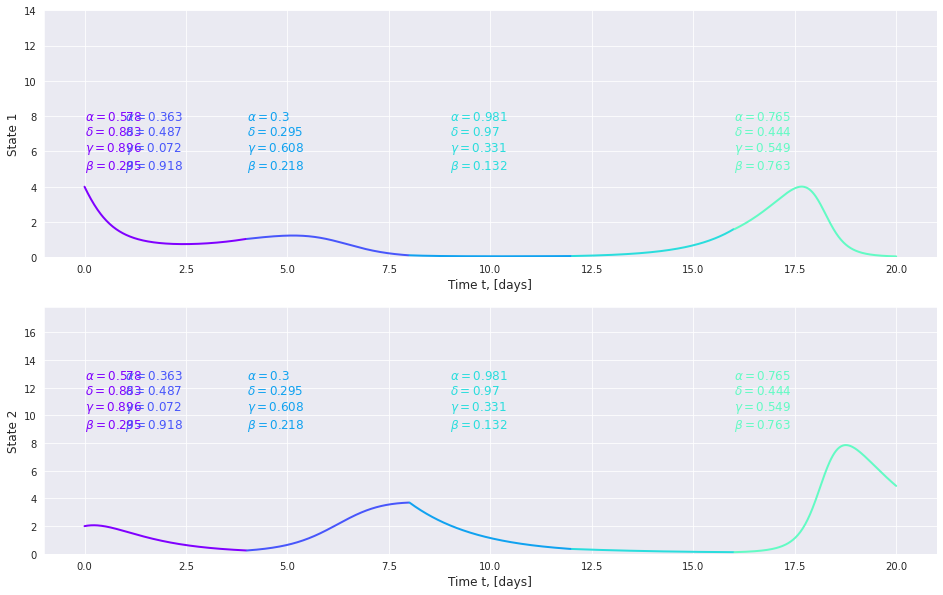

In [14]:
_run_plot(lv_times,lv_states,lv_parameters,args['ninter'],args['model'])

In [8]:
sargs ={
    'model':'sir',
    'state_init': np.array([350-1-0,1,0]),
    'time_step': 160,
    'tend':160,
    'N':350,
    'ninter':5
    }

sir = models(**sargs)
sir._run_model()
sir_states, sir_parameters, sir_times = sir._get_outputs()

In [9]:
print('states dim: {} \n'.format(sir_states.shape))
print('parameters dim: {} \n'.format(sir_parameters.shape))
print('times dim {}: \n'.format(sir_times.shape))

states dim: (5, 32, 3) 

parameters dim: (5,) 

times dim (5, 32): 



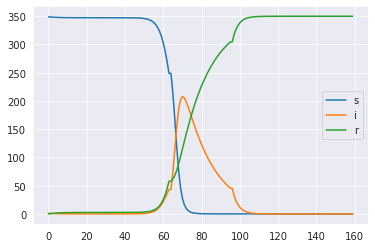

In [10]:
lines = plt.plot(np.concatenate(sir_states))
plt.legend(lines,('s','i','r'))
plt.show()

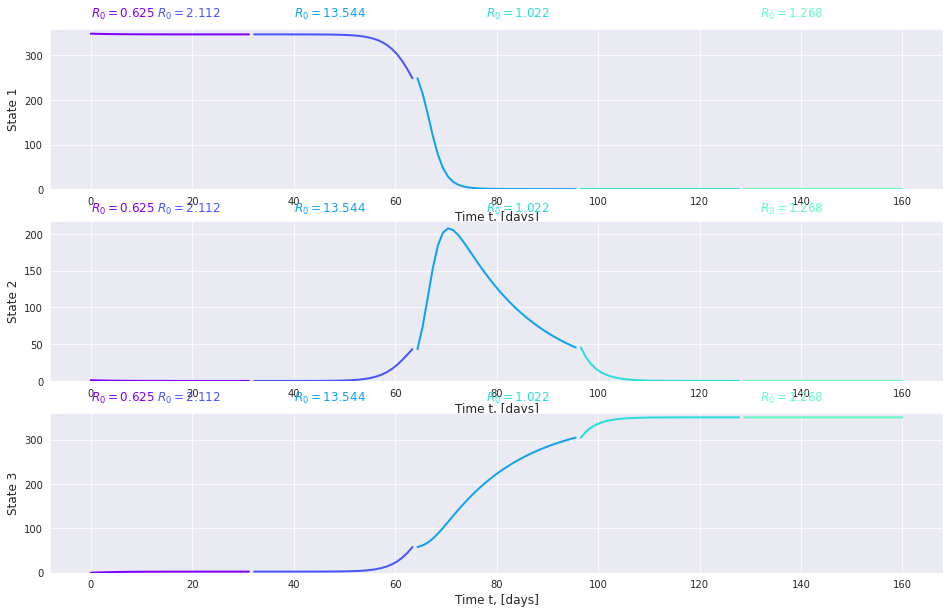

In [21]:
_run_plot(sir_times,sir_states,sir_parameters,sargs['ninter'],sargs['model'])

In [ ]:
"""
:param u: rms value of voltage
:param f: frequency
:param omega: angular frequency
:param R: resitance (values to consider 5 and 10 Ohms)
:param L: inductance
:param XL: ???????
:param C: capacitance (worth to consider 0.01 - two inertia or 0.001 - oscillator)
:param XC: ???????
:param phi: phase angle
:param alpha: closing angle [rad]
"""

u = 230 
t = np.linspace(0,0.4, 1000)
f = 50
omega = 2 * pi * f
R = 5
L = 0.1
XL = 2*pi*f*L
C = 0.01
XC = 1/(omega*C)
phi=atan((XL-XC)/R)
alpha = 0



ua = [u for k in t]

#definition of the function dp/dt

def ode_system(y,t):
    #x = i, p = di/dt
    x, p = y[0], y[1]
    
    dx = p
    dp = 1/L*(-R*p-(1/C)*x)
    
    return [dx, dp]


In [ ]:
uc0 = 0                                                   #initial capacitor voltage
y0 = [0.0, 1/L*(u-uc0)]
I = integrate.odeint(ode_system, y0, t)

ia = I[:,0]
duc = ia/C                                                #. Capacitor voltage definition:
uc = integrate.cumtrapz(duc, dx=0.4/1000, initial=0)
_ = np.append(uc, uc[999])                                    # after integration vectors t and uc had different lengths so I need to append one item

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(8,8))

ax[0].plot(t,ia, label="Current")
ax[0].set_ylabel("Current [A]")
ax[0].set_xlabel("Time [s]")
ax[0].set_title("Current in R-L-C circuit during switch-on")
ax[0].legend()

ax[1].plot(t,ua, label="Supply voltage", color="green")
ax[1].plot(t,uc, label="Capacitor voltage", color="orange")
ax[1].set_ylabel("Voltage [V]")
ax[1].set_xlabel("Time [s]")
ax[1].set_title("Supply voltage")
ax[1].legend()

fig.tight_layout()